In [1]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Read File

In [18]:
edges = []

with open('CitationPH/cit-HepPh.txt', 'r') as outf:
    edges = outf.readlines()

edges = edges[4:]
print(len(edges))

all_edge = 421578
sample_edge = all_edge

421578


In [8]:
dates = []

with open('CitationPH/cit-HepPh-dates.txt', 'r') as outf:
    dates = outf.readlines()

dates = dates[1:]
print(len(dates))

data_date = {}

for date in dates:
    date = date.replace("\n", "")
    if not date.split()[0] in data_date:
        data_date[date.split()[0]] = {}
        data_date[date.split()[0]]['dates'] = []
        data_date[date.split()[0]]['dates'].append(date.split()[1])
    else:
        data_date[date.split()[0]]['dates'].append(date.split()[1])

38557


### Create Graph

In [9]:
graph =  nx.DiGraph()

for edge in edges[:sample_edge]:
    edge = edge.replace("\n", "")
    graph.add_edge(edge.split()[0], edge.split()[1])

In [19]:
print(len(graph.nodes))
print(len(graph.edges))

34546
421578


### Count in_degree and out_degree

In [62]:
nodes = list(graph.nodes)
data = {}
# data_list = []

node_no_out_d = set()
node_no_in_d = set()

node_no_date = []

for node in nodes:
    in_degree = graph.in_degree(node)
    if in_degree == 0:
        node_no_in_d.add(node)
    out_degree = graph.out_degree(node)
    if out_degree == 0:
        node_no_out_d.add(node)
    if node in data_date:
        data[node] = [in_degree, out_degree, data_date[node]['dates'][-1], data_date[node]['dates'][-1][:7]]
    else:
        node_no_date.append(node)
        data[node] = [in_degree, out_degree, '0000-00-00', '0000-00']
    
#     data_list.append((node, in_degree, out_degree))


print('no date ', len(node_no_date))
print('no out degree ', len(node_no_out_d))
print('no in degree ', len(node_no_in_d))
    
pd_data = pd.DataFrame.from_dict(data, orient='index', columns=['in_degree', 'out_degree', 'dates', 'year-month'])
display(pd_data.head())
display(pd_data.describe())
display(pd_data.info())

# pd_data_list = pd.DataFrame.from_records(data_list, columns=['nodes', 'in_degree', 'out_degree'])
# display(pd_data_list)
# display(pd_data.describe())

<class 'str'>
no date  12807
no out degree  2388
no in degree  6316


,in_degree,out_degree,dates,year-month
9907233,3,11,1999-07-05,1999-07
9301253,59,0,1993-01-21,1993-01
9504304,33,0,1995-04-14,1995-04
9505235,23,0,1995-05-04,1995-05
9506257,10,1,1995-06-07,1995-06


,in_degree,out_degree
count,34546.000000,34546.000000
mean,12.203381,12.203381
std,25.332252,15.224474
min,0.000000,0.000000
25%,1.000000,3.000000
50%,4.000000,8.000000
75%,13.000000,16.000000
max,846.000000,411.000000


<class 'pandas.core.frame.DataFrame'>
Index: 34546 entries, 9907233 to 9405397
Data columns (total 4 columns):
in_degree     34546 non-null int64
out_degree    34546 non-null int64
dates         34546 non-null object
year-month    34546 non-null object
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


None

In [43]:
pd_data.sort_values(by='in_degree', ascending=False)

,in_degree,out_degree,dates,year-month
9803315,846,0,1998-03-11,1998-03
9804398,616,6,1998-04-24,1998-04
9407339,557,11,1994-07-20,1994-07
9512380,550,85,1995-12-15,1995-12
9606399,542,17,1996-06-21,1996-06
9807344,503,7,1998-07-12,1998-07
9306320,464,15,1993-06-26,1993-06
9905221,449,16,1999-05-04,1999-05
9408384,444,4,1994-08-29,1994-08
9507378,438,18,1995-07-21,1995-07


,in_degree,out_degree
year-month,,
1992-02,53.000000,0.000000
1992-03,35.900000,0.150000
1992-04,30.088235,0.029412
1992-05,29.051282,0.076923
1992-06,23.693878,0.102041


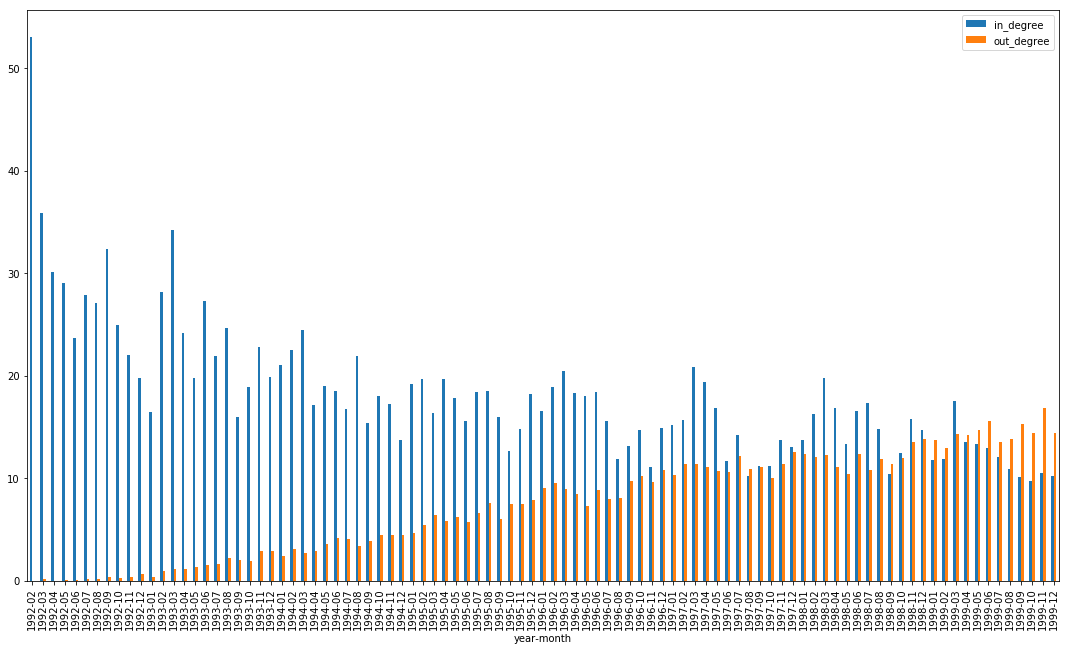

In [65]:
year_month = pd_data.groupby(['year-month']).mean()

year_month = year_month.drop(year_month.index[[0]])
display(year_month.head())

year_month.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

# plt.savefig('plotwaktu.png')

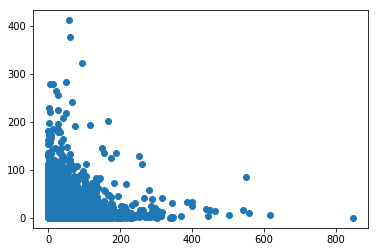

In [37]:
plt.scatter(pd_data['in_degree'],pd_data['out_degree'])
plt.show()

### Draw Graph

In [38]:
# import pygraphviz as pgv

# out_graph = pgv.AGraph(directed=True)
# in_graph = pgv.AGraph(directed=True)

# for edge in edges[:sample_edge]:
#     edge = edge.replace("\n", "")
#     out_graph.add_edge(edge.split()[0], edge.split()[1])
#     in_graph.add_edge(edge.split()[0], edge.split()[1])

# # pg_graph.draw('graphcitation.png',prog="circo")

In [39]:
# in_degree_max = float(pd_data.max()['in_degree'])
# out_degree_max = float(pd_data.max()['out_degree'])

# for node in data:
#     in_node_graph = in_graph.get_node(node)
#     out_node_graph = out_graph.get_node(node)
#     in_degree = data[node][0]
#     out_degree = data[node][1]
#     out_node_graph.attr['height']="%s"%(out_degree/out_degree_max+0.5)
#     out_node_graph.attr['width']="%s"%(out_degree/out_degree_max+0.5)
#     in_node_graph.attr['heigth']="%s"%(in_degree/in_degree_max+0.5)
#     in_node_graph.attr['width']="%s"%(in_degree/in_degree_max+0.5)
    
# out_graph.draw('out_graphcitation.png',prog="circo")
# in_graph.draw('in_graphcitation.png', prog="circo")

### Clustering